# Data Loading

In [63]:
import pandas as pd
from path import Path

DATA_RAW_PATH = Path('..\\data\\raw')
DATA_PROCESSED_PATH = Path('..\\data\\processed')

csv_file = DATA_RAW_PATH / 'Teleco_Customer_Churn.csv'
df = pd.read_csv(csv_file, index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

## First Observations

- The datasets contains 19 features and the 1 responce, with a total of 7043 instance.
- The features are a mixe of 3 numerical variables and 16 objects variables, with the **'Churn'** being a object variable.
- The features are a mixe of 3 variables **['tenure', 'MonthlyCharges', 'TotalCharges']** and 16 are categorical, with the responce being a categocial variable


Features Explaining:
- **gender**: Whether the customer is a **male** or a **female**
- **SeniorCitizen**: Whether the customer is a senior citizen (**1**) or not (**0**)
- **Partner**: Whether the customer has a partner or not **(Yes, No)**
- **Dependents**: Whether the customer has dependents or not **(Yes, No)**
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has a phone service or not **(Yes, No)**
- **MultiLines**: Whether the customer has multiple lines or not **(Yes, No, No phone service)**
- **InternetService**: Customer’s internet service provider **(DSL, Fiber optic, No)**
- **Online Security**: Whether the customer has online security or not **(Yes, No, No internet service)**
- **Online Buckup**: Whether the customer has online backup or not **(Yes, No, No internet service)**
- **DeviceProtection**: Whether the customer has device protection or not **(Yes, No, No internet service)**
- **TechSupport**: Whether the customer has tech support or not **(Yes, No, No internet service)**
- **StreamingTV**: Whether the customer has streaming TV or not **(Yes, No, No internet service)**
- **StreamingMovies**: Whether the customer has streaming movies or not **(Yes, No, No internet service)**
- **Contract**: The contract term of the customer **(Month-to-month, One year, Two year)**
- **PaperlessBilling**: Whether the customer has paperless billing or not **(Yes, No)**
- **PaymentMethod**: The customer’s payment method **(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))**
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalChanges**: The total amount charged to the customer


Responce Explaining:
- **Churn**: Whether the customer churned or not **(Yes or No)**

The TotalChanges feature is supposed to hold a numeric data type but it holds an object data type which is an issue that must be address

# Data Cleaning

In [65]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [66]:
df.duplicated().sum()

np.int64(22)

In [67]:
clean_df = df.drop_duplicates()

The data does not contain any missing values, but has 22 duplicated value. Thus the number of instace training that we can work with are 7021

# Data Discovering:

In [68]:
dummy = clean_df.copy()

In [69]:
dummy['TotalCharges'] = pd.to_numeric(dummy['TotalCharges'], errors='coerce')
dummy['TotalCharges'].isna().sum()

np.int64(11)

It looks like that the are invalid values in the **TotalCharges** features, let work on it

In [70]:
index_invalid_charges = dummy[dummy['TotalCharges'].isna()].index
df.loc[index_invalid_charges]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


Based on the result there is missing values in the **TotalCharges** features, thus the missing values in this column need to imputed or dropped. We will test by using both the dataset with the missing values dropped and the one with the missing values imputed.

In [71]:
raw_data_version_dropped = dummy.dropna()
raw_data_version_dropped.to_csv(DATA_RAW_PATH / 'version_dropped.csv')

The dropped dataset only contains 7010, the values are not totaly inspected and processed

In [72]:
process_data_version_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null 

In [73]:
dummy.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7010.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2266.820832
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,55.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [74]:
dummy.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3541,3619,4911,6339,3368,3090,3490,3080,3087,3465,2802,2777,3853,4161,2359,5164


In [75]:
columns_values = {}

for col in dummy.select_dtypes('object'):
    columns_values[col] = dummy[col].unique()
    
columns_values

{'gender': array(['Female', 'Male'], dtype=object),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingTV': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingMovies': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'PaymentMethod': array(['Electronic check', 'Mailed 

- The columns with the object type have a number of possible values of either **2, 3 or 4**,
with the** majority of having 3 unique values**, and **one unique columns 'PayementMethod' havind 4 unique values**, **the rest has 2 unique values.**, thus this columns are considered categorical columns.

- Columns with **2 unique values**, refers to an answer of a **yes or no question**, for example: **'Do you have a parter? (Possible answers yes/no)'**, except for the column **'gender'** which its unique values are **'Female'** and **'Male'**

- Columns with **3 unique values offer the same values as with those having only 2 possible values**, but with an addition to **one value that is often related to the columns with 2 category when the value is 'No'.** The only columns that **does not follow this pattern are 'InternetService' and 'Contract'**.

# Data Visiualization

In [76]:
dummy['SeniorCitizen'] = dummy['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [77]:
categorical_col = dummy.select_dtypes('object').columns
numerical_col = dummy.select_dtypes('number').columns

In [78]:
len(categorical_col), len(numerical_col)

(17, 3)

## Categorical Data Visiualization

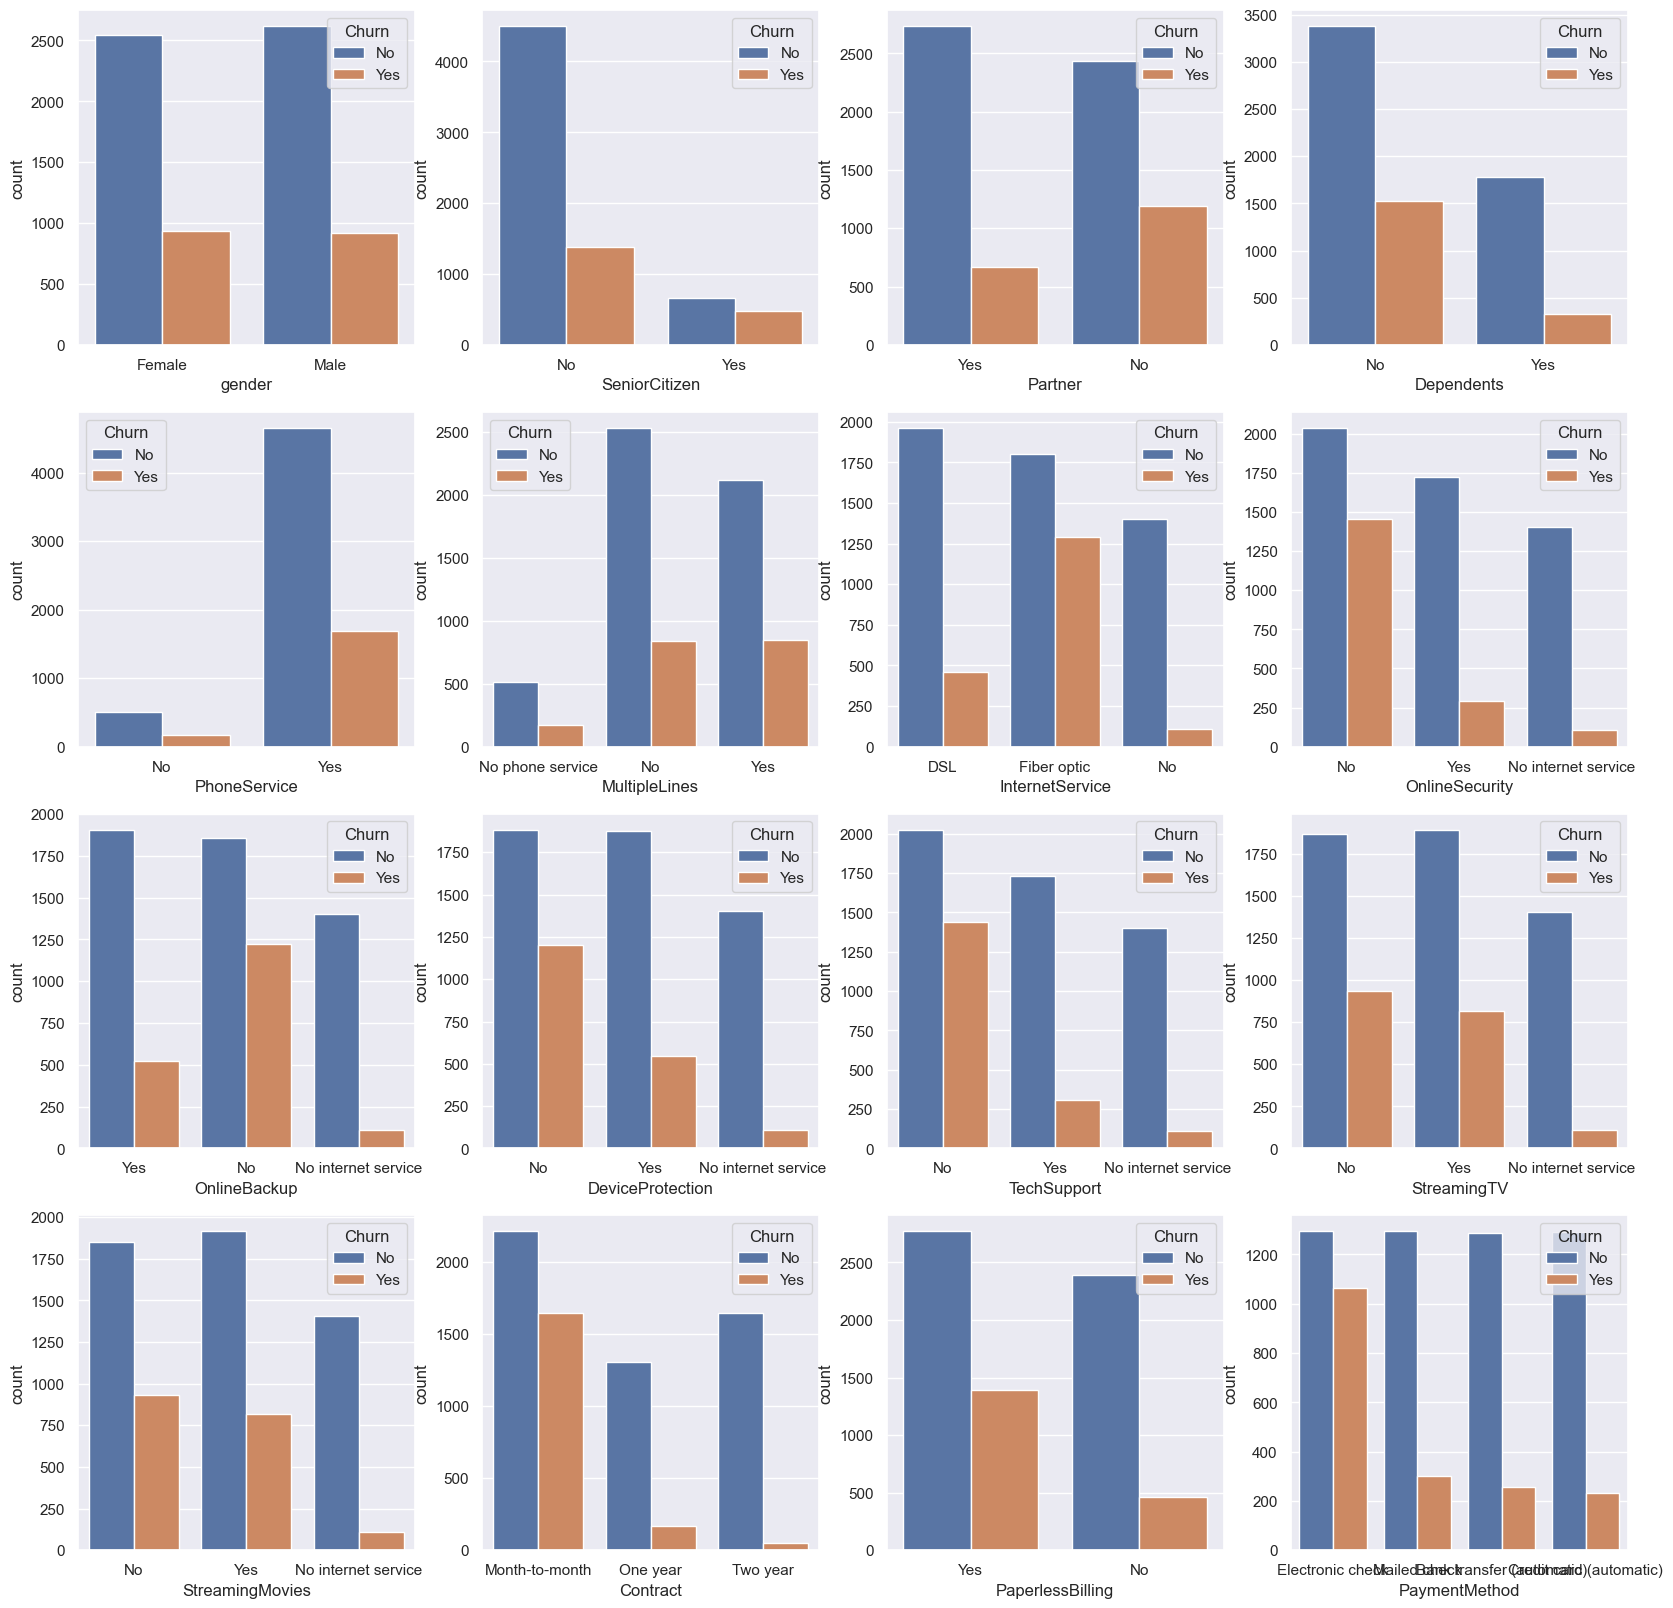

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

def plot_categorical(df: pd.DataFrame, x: np.ndarray, hue:str, nrows: int, ncols: int):
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
    columns = x.reshape(nrows, ncols)
    for i in range(nrows):
        for j in range(ncols):
            sns.countplot(df, x=columns[i, j], hue=hue, ax=axes[i, j])
    
    
plot_categorical(dummy, np.array(categorical_col[:-1]), categorical_col[-1], 4, 4)

<Axes: xlabel='Churn', ylabel='count'>

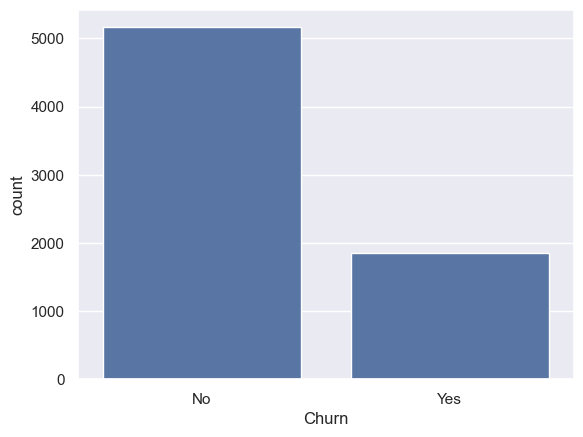

In [80]:
sns.countplot(dummy, x='Churn')

In [81]:
dummy['Churn'].value_counts(True)

Churn
No     0.735508
Yes    0.264492
Name: proportion, dtype: float64

Based on the data, about 26.54% customers churn while the remaining did not. This provide evidence that our sample is overfitting for the non-churning customers.

## Numerical Data Visiulization

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

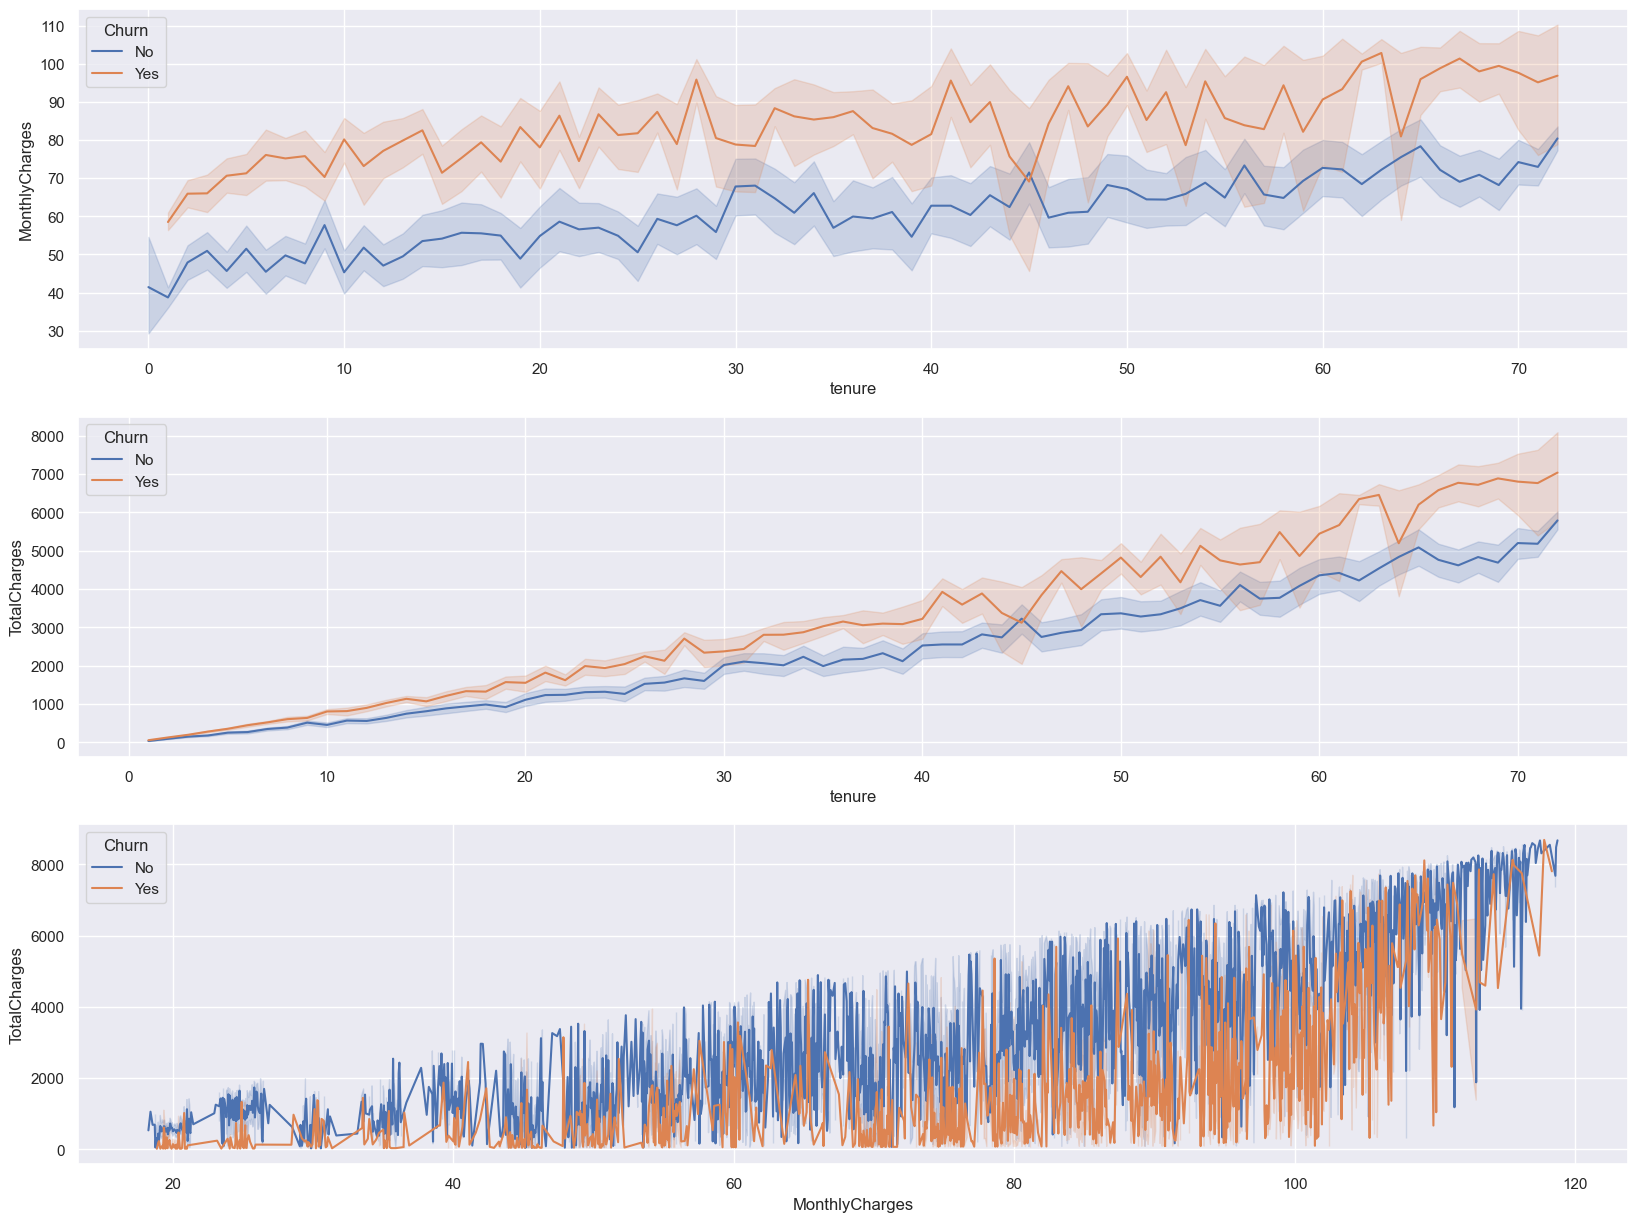

In [82]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

sns.lineplot(data=dummy, x='tenure', y='MonthlyCharges', hue='Churn', ax=axes[0])
sns.lineplot(data=dummy, x='tenure', y='TotalCharges', hue='Churn', ax=axes[1])
sns.lineplot(data=dummy, x='MonthlyCharges', y='TotalCharges', hue='Churn', ax=axes[2])